In [62]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [53]:
iris = load_iris()
print(iris.data.shape)

(150, 4)


In [54]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [55]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### KMeans Clustering

KMeans is an unsupervised clustering algorithm that partitions data into K clusters by minimizing the 
distance between points within a cluster.

Why suitable for Iris dataset?

The Iris dataset has natural grouping tendencies (species) that KMeans can discover based on feature similarities.

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)


KMeans(n_clusters=4, random_state=42)

In [57]:
labels = kmeans.labels_
print(labels)
df['Cluster'] = labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 0 3 3 2 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]


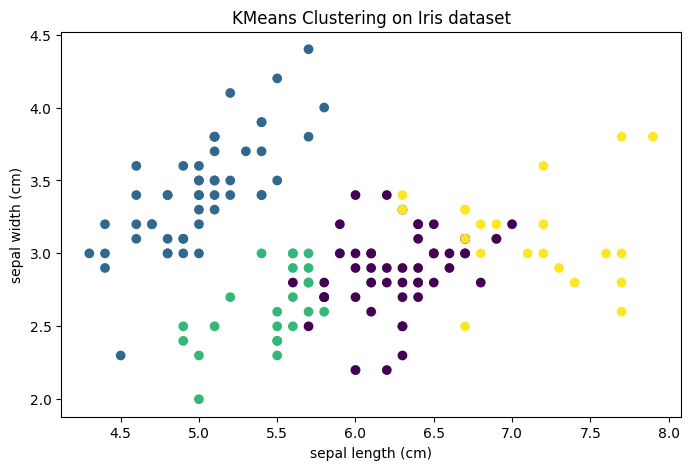

In [58]:
# Visualize clusters 
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KMeans Clustering on Iris dataset")
plt.show()

### Hierarchical Clustering 

- Hierarchical clustering builds a tree (dendrogram) of clusters by either:

- Agglomerative (bottom-up): start with individual points, merge closest pairs iteratively.

- Divisive (top-down): start with all points, split iteratively.

- It does not require specifying number of clusters initially, unlike KMeans.

Why suitable for Iris dataset?

Hierarchical clustering can reveal nested cluster structures in data and is useful when the number of clusters is uncertain or when we need a dendrogram for interpretability.

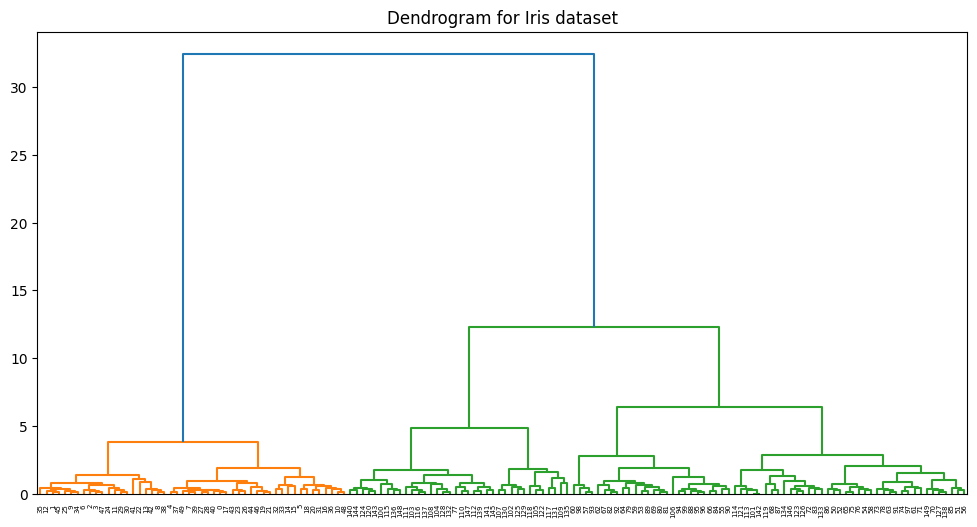

In [67]:
# Perform hierarchical clustering using 'ward' linkage
linked = linkage(df.iloc[:,:4], method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Iris dataset")
plt.show()

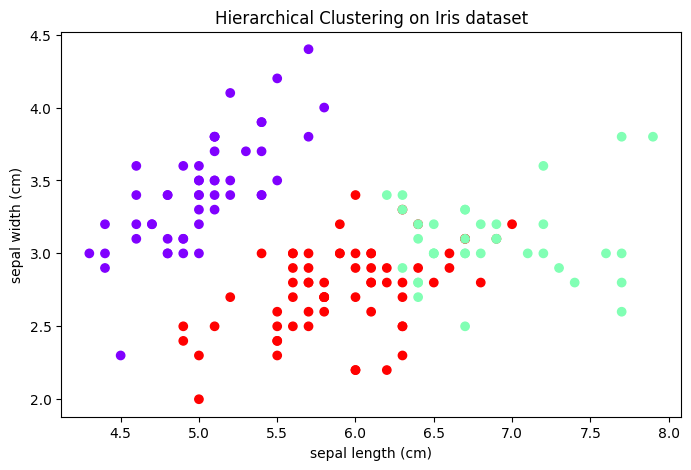

In [64]:
labels_hier = fcluster(linked, 3, criterion='maxclust')

# Visualize clusters using first two features
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels_hier, cmap='rainbow')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Hierarchical Clustering on Iris dataset")
plt.show()